<a href="https://colab.research.google.com/github/Narendraiitg/Ford_Car_Price_Prediction_project/blob/main/Ford_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
#Importing the useful libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Loading the data and preprocessing it

In [77]:
# loading the dataset from ford.csv file to pandas dataframe
ford_car = pd.read_csv('/content/ford.csv')

In [78]:
ford_car.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [79]:
# Checking the number of col & rows in the dataset
ford_car.shape

(17966, 9)

In [80]:
# Gathering some more information about the data set
ford_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


So we are having 9 columns and 17966 rows in our data set

In [81]:
# Checking some missing values 
ford_car.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

From above we are sure that there is no missing values in any of the columns, if some missing values found in any of the columns then we will have to first giving those places with some suaitable values, like mean of that columns or median etc.

In [82]:
# checking the distribution of categorical data
print(ford_car.fuelType.value_counts())
print(ford_car.transmission.value_counts())

Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64
Manual       15518
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64


We can see that fuel type is having 5 categories
Petrol     
Diesel       
Hybrid         
Electric
Other

And we have 3 categories in transmission type

Manual

Automatic

Semi-Auto







Encoding the Categorical Data

In [83]:
# encoding "Fuel_Type" Column
ford_car.replace({'fuelType':{'Petrol':0,'Diesel':1,'Hybrid':2,'Electric':3, 'Other':4}},inplace=True)

# encoding "Transmission" Column
ford_car.replace({'transmission':{'Manual':0,'Automatic':1,'Semi-Auto':2}},inplace=True)

In [84]:
ford_car.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,1,15944,0,150,57.7,1.0
1,Focus,2018,14000,0,9083,0,150,57.7,1.0
2,Focus,2017,13000,0,12456,0,150,57.7,1.0
3,Fiesta,2019,17500,0,10460,0,145,40.3,1.5
4,Fiesta,2019,16500,1,1482,0,145,48.7,1.0


In [85]:
X = ford_car.drop(['model','price'],axis=1)
Y = ford_car['price']

In [86]:
X.head()

,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,1,15944,0,150,57.7,1.0
1,2018,0,9083,0,150,57.7,1.0
2,2017,0,12456,0,150,57.7,1.0
3,2019,0,10460,0,145,40.3,1.5
4,2019,1,1482,0,145,48.7,1.0


In [87]:
Y.head()

0    12000
1    14000
2    13000
3    17500
4    16500
Name: price, dtype: int64

Splliting the data into training and testing

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.01, random_state=2)

Tarining our model on training data

# Linear regression

In [89]:
# loading the linear regression model
LRM = LinearRegression()

In [90]:
LRM.fit(X_train,Y_train)

LinearRegression()

Evaluating our model

In [91]:
# Prediction on Training data
training_data_prediction = LRM.predict(X_train)

In [92]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7366641138649912


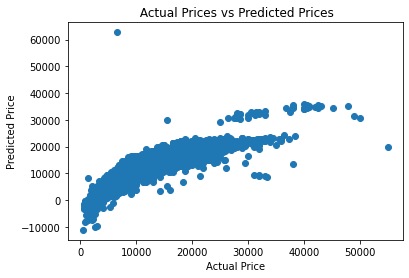

In [93]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [94]:
# prediction on Training data
test_data_prediction = LRM.predict(X_test)

In [95]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7970868109997312


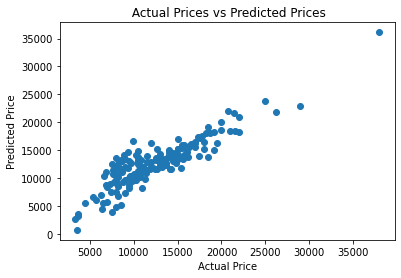

In [96]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

## Lasso Regression

In [97]:
# loading the linear regression model
LasRM = Lasso()

In [98]:
LasRM.fit(X_train,Y_train)

Lasso()

Evaluating our Lasso model on training data

In [99]:
# Prediction on Training data
training_data_prediction_Las = LasRM.predict(X_train)

In [100]:
# R squared Error
error_score_Las = metrics.r2_score(Y_train, training_data_prediction_Las)
print("R squared Error : ", error_score_Las)

R squared Error :  0.7366637049079484


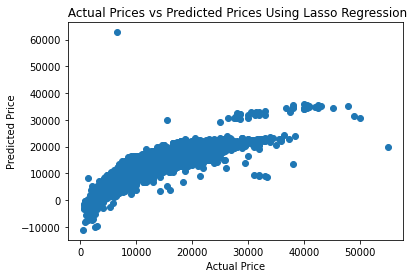

In [101]:
plt.scatter(Y_train, training_data_prediction_Las)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices Using Lasso Regression")
plt.show()

In [102]:
# prediction on Training data
test_data_prediction_Las = LasRM.predict(X_test)

In [103]:
# R squared Error
error_score_Las = metrics.r2_score(Y_test, test_data_prediction_Las)
print("R squared Error : ", error_score_Las)

R squared Error :  0.7970537424238988


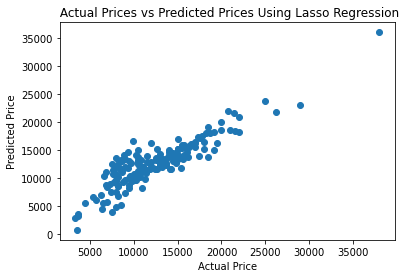

In [104]:
plt.scatter(Y_test, test_data_prediction_Las)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices Using Lasso Regression")
plt.show()